In [1]:
# install packages
# pip install yfinance

In [2]:
# import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# general settings for data frames
pd.set_option('display.max_rows', None)

In [4]:
stocks = {
                    # index
                    's&p_500_etf_trust': 'SPY',\
                    #s&p 500 tech stock
                    'apple': 'AAPL', 'tesla': 'TSLA', 'amazon': 'AMZN', 'facebook': 'FB', 'microsoft': 'MSFT',\
                    #pandemic stock
                    'zoom': 'ZM', 'american_airline': 'AAL', 'amc': 'AMC', 'docusign': 'DOCU', \
                    'netflix': 'NTFX', 'peloton': 'PTON',
                    # meme stock
                   'game_stop': 'GME', 'kodak': 'KODK', 'zoom_technologies': 'ZTNO', 
                    # newly ipo/acquire
                    'doordash': 'DASH', 'airbnb': 'ABNB', 'slack': 'WORK', 'snowflake':'SNOW',
                    # others
                    'aurora_cannabis': 'ACB', 'tilray': 'TLRY', 'sun_power': 'SPWR'}

In [5]:
# read data
def read_stock_data(stock_name, start_time, end_time):
    data = yf.Ticker(stocks[stock_name]).history(start = start_time, end = end_time)
    return data

## Apple announced a stock split on 2020-07-30, and in effect for trading on 2020-08-31. Let's see how the stock price has changed during that time period 

[Text(0.5, 1.0, 'AAPL Price Before 1-4 Split'), Text(0, 0.5, 'Closed Price')]

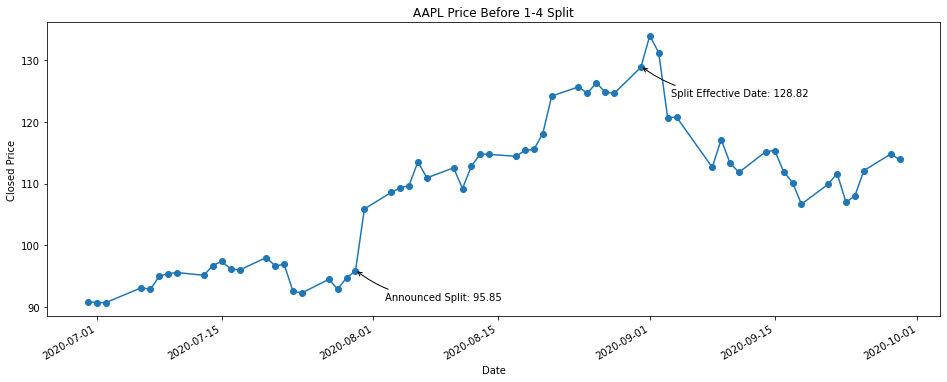

In [6]:
apple = read_stock_data(stock_name = 'apple', start_time = '2020-06-30', end_time = '2020-09-30')
fig, ax = plt.subplots(figsize=(16, 6))
apple['Close'].plot(marker='o')

ax.annotate('Announced Split: 95.85', xy = ('2020-07-30', 96), xycoords = 'data',
            xytext = (30, -30), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->',
                            connectionstyle = 'arc3,rad = -0.2'))

ax.annotate('Split Effective Date: 128.82', xy = ('2020-08-31', 129), xycoords = 'data',
            xytext = (30, -30), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->',
                            connectionstyle = 'arc3,rad=-0.2'))

ax.set(title = 'AAPL Price Before 1-4 Split',
       ylabel = 'Closed Price')

## Zoom stock has boomed at the beginning of the pandemic in early March. Ironically, at the same time, there was another stock, Zoom Technologies, which is not even remotely related with Zoom also sky-rocketed. Guess what was the reason?

<AxesSubplot:xlabel='Date'>

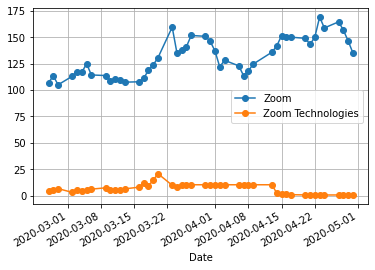

In [7]:
zoom = read_stock_data(stock_name = 'zoom', start_time = '2020-02-26', end_time = '2020-05-01')
zoom_tech = read_stock_data(stock_name = 'zoom_technologies', start_time = '2020-02-26', end_time = '2020-05-01')

stock_pile = pd.DataFrame({"Zoom": zoom['Close'],
                           "Zoom Technologies": zoom_tech['Close']
                          })
stock_pile.plot(grid = True, marker='o')

## A more straightforward comparison can be made when we plot them in different scales

[Text(0.5, 1.0, 'Zoom Stock Booming')]

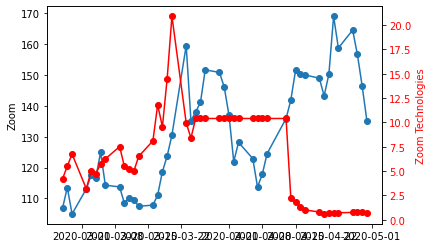

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(zoom.index, zoom['Close'], marker='o')
ax1.set_ylabel("Zoom")

ax2 = ax1.twinx()
ax2.plot(zoom_tech.index, zoom_tech['Close'], 'r-', marker='o')
ax2.set_ylabel("Zoom Technologies", color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax.set(title = 'Zoom Stock Booming')

## Let's take a look at the wild game stop

[Text(0.5, 1.0, 'GME Stock Prices'), Text(0, 0.5, 'Closed Price')]

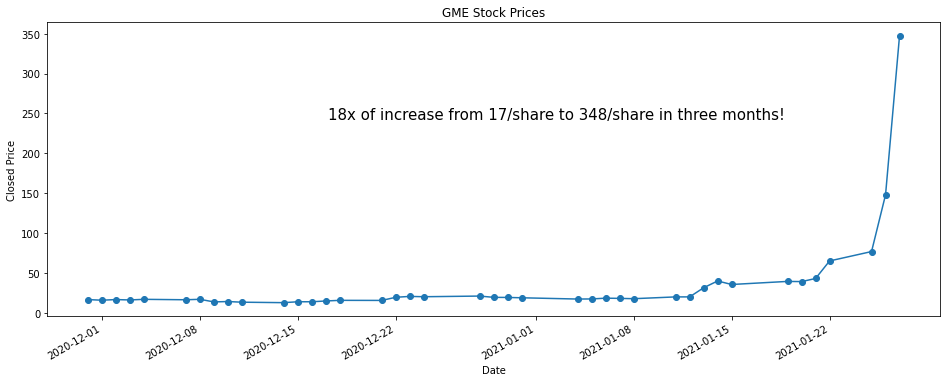

In [9]:
gme = read_stock_data(stock_name = 'game_stop', start_time = '2020-11-30', end_time = '2021-01-28')
fig, ax = plt.subplots(figsize=(16, 6))
gme['Close'].plot(marker='o')

ax.annotate('18x of increase from 17/share to 348/share in three months!', xy = ('2020-12-15', 280), xycoords = 'data',
            xytext = (30, -30), textcoords = 'offset points', fontsize=15)

ax.set(title = 'GME Stock Prices',
       ylabel = 'Closed Price')

## There are some quick movers during Pandemic, let's take a look!

- NTFX: No data found, symbol may be delisted


<AxesSubplot:xlabel='Date'>

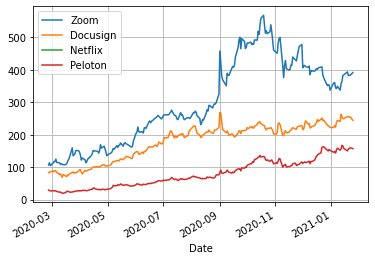

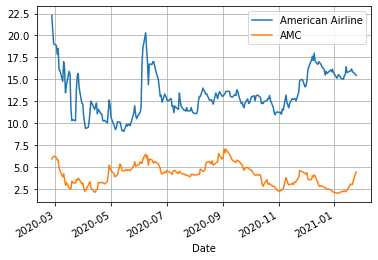

In [10]:
zoom = read_stock_data(stock_name = 'zoom', start_time = '2020-02-26', end_time = '2021-01-26')
american_airline = read_stock_data(stock_name = 'american_airline', start_time = '2020-02-26', end_time = '2021-01-26')
amc = read_stock_data(stock_name = 'amc', start_time = '2020-02-26', end_time = '2021-01-26')
docusign = read_stock_data(stock_name = 'docusign', start_time = '2020-02-26', end_time = '2021-01-26')
netflix = read_stock_data(stock_name = 'netflix', start_time = '2020-02-26', end_time = '2021-01-26')
peloton = read_stock_data(stock_name = 'peloton', start_time = '2020-02-26', end_time = '2021-01-26')


stock_pile1 = pd.DataFrame({"Zoom": zoom['Close'],
                           "Docusign": docusign['Close'],
                            "Netflix": netflix['Close'],
                            "Peloton": peloton['Close']
                          })
stock_pile1.plot(grid = True)

stock_pile2 = pd.DataFrame({
                           "American Airline": american_airline['Close'],
                            "AMC": amc['Close']
                          })
stock_pile2.plot(grid = True)

